In [1]:
from IPython.core.display import HTML
HTML("<style>.container { width:100% !important; }</style>")

In [2]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from IPython.display import display
from itertools import combinations


#!/usr/bin/env python

"""
Example classifier on Numerai data using a logistic regression classifier.
To get started, install the required packages: pip install pandas, numpy, sklearn
"""

import pandas as pd
import numpy as np
from sklearn import metrics, preprocessing, linear_model


pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 12)
pd.set_option('display.width', 230)


def show_heatmap(dataframe):
    
    dataframe.fillna(0.0, inplace=True)
    
    # plt.imshow(, cmap=plt.cm.gray)
    plt.pcolor(dataframe, vmin=0, vmax=1)
    #plt.yticks(np.arange(0.5, len(dataframe.index), 1), dataframe.index)
    #plt.xticks(np.arange(0.5, len(dataframe.columns), 1), dataframe.columns)
    plt.colorbar()
    
    # plot_surface with points X,Y,Z and data_value as colors
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=colors,
                       linewidth=0, antialiased=True)
    
    '''
    print('\n')
    print('dataframe.index.values')
    print(dataframe.index.values)
    print('\n')
    print('dataframe.columns.values')
    print(dataframe.columns.values)
    print('\n')
    print('')
    print()
    '''
    
    plt.show()
    
    
def show_3d_heatmap_stack(df):
    
    X = df.stack()
    print('type(X)')
    print(type(X))
    print('X')
    print(X)
    

    x = X.index.get_level_values(0)
    y = X.index.get_level_values(1)
    #z = 
    
    # ax.plot_trisurf(X.x, X.y, X.z, cmap=cm.jet, linewidth=0.2)
    # plt.show()
    
    
def extract_feature_df(dataframe, sort_col=None):
    
    dataframe = dataframe.copy()
    
    if sort_col:
        dataframe.sort_values(sort_col, inplace=True)
    
    
    features = [f for f in list(dataframe) if "feature" in f]
    X = dataframe[features].copy()                     # pd.DataFrame of all training features
    Y = dataframe["target"].copy()                     # pd.Series of the classes
    #x_prediction = prediction_data[features].copy()        # pd.DataFrame of all validation and test features
    
    return X, Y

def main():
    # Set seed for reproducibility
    np.random.seed(0)

    print("Loading data...")
    # Load the data from the CSV files
    ''' training data contains only training data'''
    training_data = pd.read_csv('numerai_training_data.csv', header=0)
    '''
    prediction_data contains both validation data (with targets) and test data
    (without targets)
    '''
    prediction_data = pd.read_csv('numerai_tournament_data.csv', header=0)

    # print('\n')
    # print('prediction_data')
    # print(prediction_data)


    # Transform the loaded CSV data into numpy arrays
    '''
    Goes through all the pd.DataFrame columns titles. If they contain 'feature'
    they are added to the features list
    '''
    
    training_data.set_index(['id'], drop=True, inplace=True)
    
    training_data = training_data[training_data['data_type'] == 'train']
    
    
    era1 = training_data[training_data['era']=='era1'].copy()
    
    #print(era1.sort_values)
    
    #grouped = training_data.groupby('era')
    
    X, Y = extract_feature_df(era1,'feature8')
    '''
    print('\n')
    print('X')
    print(X)
    
    print('\n')
    print('X.index.name')
    print(X.index.name)
    '''
    
    X.columns.name = 'features'
    '''
    print('\n')
    print('X.columns.name')
    print(X.columns.name)
    '''
    
    print('starting')
    show_heatmap(X)
    # show_3d_heatmap_stack(X)
    print ('done')
    
    
    
if __name__ == '__main__':
    main()


/home/donal/cyberdyne/rejewski/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/donal/cyberdyne/rejewski/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Loading data...
starting


NameError: name 'ax' is not defined

# Version using pd.melt instead of pd.stack

In [3]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
from itertools import combinations

import pandas as pd
import numpy as np
from sklearn import metrics, preprocessing, linear_model

#!/usr/bin/env python

"""
Example classifier on Numerai data using a logistic regression classifier.
To get started, install the required packages: pip install pandas, numpy, sklearn
"""



pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 12)
pd.set_option('display.width', 230)


def show_3d_heatmap_melt(df, features_list):
    
    X = pd.melt(df, id_vars=['id'], value_vars=features_list)
    
    print('type(X)')
    print(type(X))
    print('X')
    print(X)
    
    x = X['id']
    y = X['features']
    z = X['value']
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(x, y, z, linewidth=0.2)
    plt.show()
    
    
def extract_feature_df(dataframe, sort_col=None):
    
    dataframe = dataframe.copy()
    
    if sort_col:
        dataframe.sort_values(sort_col, inplace=True)
    
    features = [f for f in list(dataframe) if "feature" in f]
    cols_to_keep = ['id']
    cols_to_keep.extend(features)

    X = dataframe[cols_to_keep].copy()                     # pd.DataFrame of all training features
    Y = dataframe["target"].copy()                     # pd.Series of the classes
    #x_prediction = prediction_data[features].copy()        # pd.DataFrame of all validation and test features
    
    return X, Y, features

def main():
    # Set seed for reproducibility
    np.random.seed(0)

    print("Loading data...")
    # Load the data from the CSV files
    ''' training data contains only training data'''
    training_data = pd.read_csv('numerai_training_data.csv', header=0)
    '''
    prediction_data contains both validation data (with targets) and test data
    (without targets)
    '''
    prediction_data = pd.read_csv('numerai_tournament_data.csv', header=0)

    # print('\n')
    # print('prediction_data')
    # print(prediction_data)


    # Transform the loaded CSV data into numpy arrays
    '''
    Goes through all the pd.DataFrame columns titles. If they contain 'feature'
    they are added to the features list
    '''
    
    #training_data.set_index(['id'], drop=True, inplace=True)
    
    
    training_data = training_data[training_data['data_type'] == 'train']
    
    
    era1 = training_data[training_data['era']=='era1'].copy()
    
    
    
    #print(era1.sort_values)
    
    #grouped = training_data.groupby('era')
    
    X, Y, features_list = extract_feature_df(era1,'feature8')
    
    #print('\n')
    #print('X')
    #print(X)
    
    '''
    print('\n')
    print('X.index.name')
    print(X.index.name)
    '''
    
    X.columns.name = 'features'
    '''
    print('\n')
    print('X.columns.name')
    print(X.columns.name)
    '''
    
    print('starting')
    show_3d_heatmap_melt(X, features_list)
    print ('done')
    
    
    
if __name__ == '__main__':
    main()


Loading data...
starting
type(X)
<class 'pandas.core.frame.DataFrame'>
X
          id   features    value
0     393260   feature1  0.86798
1     371318   feature1  0.80581
2     470999   feature1  0.83882
3     407467   feature1  0.74852
4     424226   feature1  0.78988
5     429915   feature1  0.69303
6     432119   feature1  0.75694
7     391659   feature1  0.71130
8     395562   feature1  0.72306
9     370324   feature1  0.67763
10    478762   feature1  0.60113
11    358599   feature1  0.62433
12    417947   feature1  0.63631
13    466477   feature1  0.56239
14    410423   feature1  0.60477
...      ...        ...      ...
2589  476777  feature21  0.70323
2590  441808  feature21  0.41702
2591  501673  feature21  0.42063
2592  382355  feature21  0.74923
2593  462687  feature21  0.47801
2594  375297  feature21  0.45141
2595  377450  feature21  0.44855
2596  466869  feature21  0.45283
2597  444373  feature21  0.51978
2598  387693  feature21  0.40567
2599  376544  feature21  0.51170
260

ValueError: could not convert string to float: 'feature21'

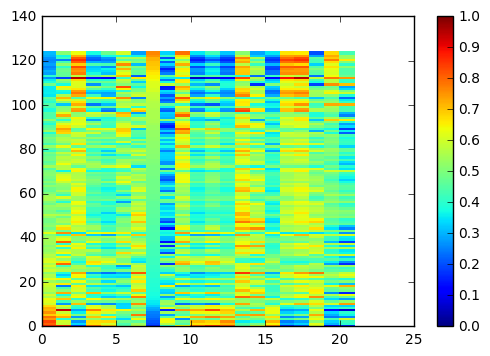

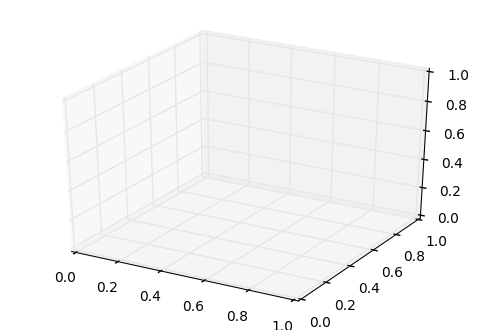

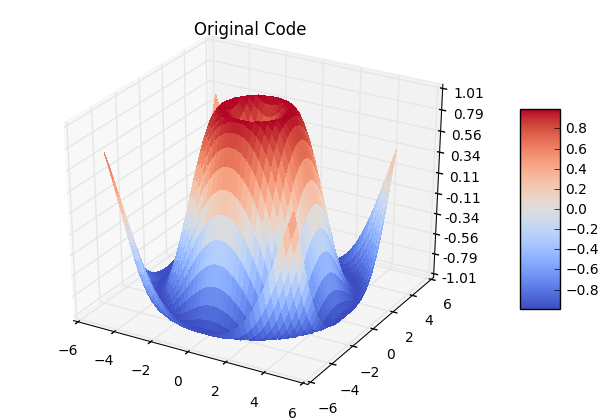

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

## Matplotlib Sample Code using 2D arrays via meshgrid
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X ** 2 + Y ** 2)
Z = np.sin(R)
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Original Code')
plt.show()